In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sklearn.__version__)

1.18.5
1.0.5
3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]
0.23.1


In [3]:
df = pd.read_csv("..//resources//data//biometrics.csv")

In [4]:
df.head()

,TimeStamp,HR,RR,HRV,MicroSiemens,SCR,SCR_MIN,ArousalMean,ValenceMean,ArousalSD,ValenceSD
0,2020-10-12 18:56:37,75.6,0,0.10,4.96,0,0,0.0,0.0,0.0,0.0
1,2020-10-12 18:56:38,74.6,804,0.00,4.96,0,0,0.0,0.0,0.0,0.0
2,2020-10-12 18:56:39,75.9,790,0.00,4.96,0,0,0.0,0.0,0.0,0.0
3,2020-10-12 18:56:41,77.5,774,0.00,4.96,0,0,0.0,0.0,0.0,0.0
4,2020-10-12 18:56:41,79.1,759,0.64,4.96,0,0,0.0,0.0,0.0,0.0


In [5]:
df.describe()

,HR,RR,HRV,MicroSiemens,SCR,SCR_MIN,ArousalMean,ValenceMean,ArousalSD,ValenceSD
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,74.945983,801.850416,10.378615,5.986925,0.202216,4.695291,3.367241,2.837218,1.276096,0.901363
std,5.052463,67.191598,5.372813,0.440218,0.402210,1.537026,3.005960,2.874987,1.078309,0.780321
min,62.300000,0.000000,0.000000,5.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.500000,772.000000,6.200000,5.670000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,74.400000,806.000000,9.330000,5.940000,0.000000,5.000000,3.711539,2.208333,1.853617,1.293738
75%,77.600000,839.000000,13.050000,6.290000,0.000000,6.000000,6.173077,5.770833,2.105351,1.560682
max,92.000000,963.000000,23.960000,7.200000,1.000000,8.000000,7.461538,8.083333,2.711005,2.260000


In [6]:
#sns.pairplot(df, height=4, aspect=1);

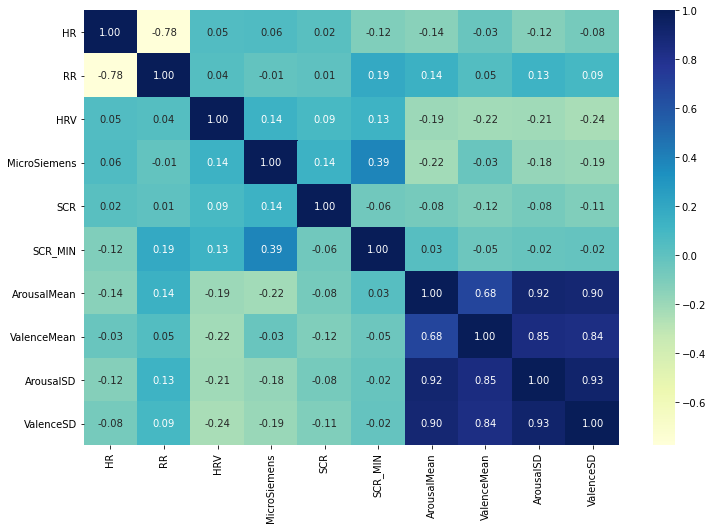

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()

In [8]:
# Filter outliers (arousal - valence = 0)
filter = df['ArousalMean'] > 0
filtered = df[filter]
filtered.head()

,TimeStamp,HR,RR,HRV,MicroSiemens,SCR,SCR_MIN,ArousalMean,ValenceMean,ArousalSD,ValenceSD
54,2020-10-13 18:57:19,75.8,792,5.20,5.45,0,4,6.07,7.63,2.31,1.41
55,2020-10-13 18:57:20,74.9,801,6.15,5.60,0,4,6.07,7.63,2.31,1.41
56,2020-10-13 18:57:21,80.4,746,6.85,5.68,0,4,7.31,7.21,1.64,2.26
57,2020-10-13 18:57:22,78.1,768,7.08,5.69,0,4,7.31,7.21,1.64,2.26
58,2020-10-13 18:57:22,73.7,814,6.62,5.63,0,4,7.31,7.21,1.64,2.26


In [9]:
X = df[['HR', 'RR', 'HRV']].values
y = df[['ArousalMean']].values
X

array([[7.560e+01, 0.000e+00, 1.000e-01],
       [7.460e+01, 8.040e+02, 0.000e+00],
       [7.590e+01, 7.900e+02, 0.000e+00],
       ...,
       [7.430e+01, 8.070e+02, 1.152e+01],
       [7.940e+01, 7.560e+02, 1.152e+01],
       [8.110e+01, 7.400e+02, 1.152e+01]])

In [10]:
X[0]

array([75.6,  0. ,  0.1])

In [11]:
y

array([[0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.      ],
       [0.  

In [12]:
# Para poder usar un clasificador, los datos de la variable target deben ser discretos.
#Los convertimos a True-False (Aroused-NotAroused) con el fin de poder entrear un clasificador binario

y_train_aroused = (y > 4)

In [13]:
y_train_aroused

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [